<a href="https://colab.research.google.com/github/shiva-990/electric-power-consumption/blob/main/projectml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
energy_df=pd.read_csv(r"/content/drive/MyDrive/household_power_consumption.txt",sep=";",
                      parse_dates={'DateTime' : ['Date', 'Time']}, infer_datetime_format=True,low_memory=False,
                      index_col='DateTime',na_values=['nan','?'])



<ipython-input-17-1ad98e1ccdbc>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energy_df=pd.read_csv(r"/content/drive/MyDrive/household_power_consumption.txt",sep=";",
<ipython-input-17-1ad98e1ccdbc>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  energy_df=pd.read_csv(r"/content/drive/MyDrive/household_power_consumption.txt",sep=";",


In [ ]:
energy_df.isnull().sum()

,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
energy_df.fillna(energy_df.mean(), inplace=True)
energy_df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
energy_df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
energy_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
energy_df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
x = energy_df.drop('Global_intensity',axis=1)
y= energy_df['Global_intensity']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=101,shuffle=True)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Mean Squared Error: 0.028946476375725647
R-squared: 0.9985083814461132


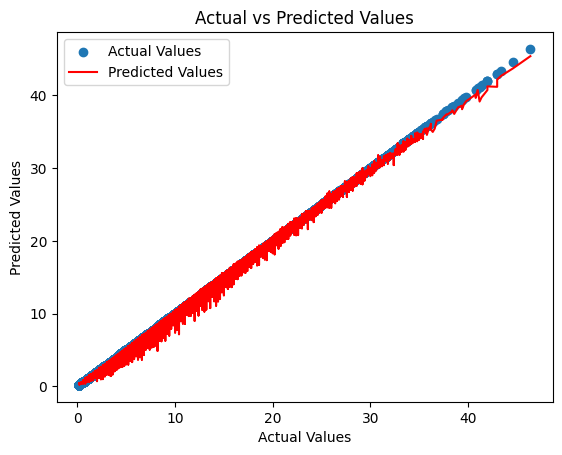

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
y_pred = model.predict(x_test)
y_test_reset = y_test.reset_index(drop=True)
sorted_indices = np.argsort(y_test_reset)
y_test_sorted = y_test_reset[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test_sorted, y_test_sorted, label="Actual Values")
plt.plot(y_test_sorted, y_pred_sorted, color='red', label="Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
prediction = model.predict(x_test)
print(y_test.shape)
print(prediction.shape)

(415052,)
(415052,)


In [ ]:
print(type(y_test), type(prediction))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [ ]:
print(np.unique(y_test))
print(np.unique(prediction))

[ 0.2         0.4         0.6         0.8         1.          1.2
  1.4         1.6         1.8         2.          2.2         2.4
  2.6         2.8         3.          3.2         3.4         3.6
  3.8         4.          4.2         4.4         4.6         4.62775931
  4.8         5.          5.2         5.4         5.6         5.8
  6.          6.2         6.4         6.6         6.8         7.
  7.2         7.4         7.6         7.8         8.          8.2
  8.4         8.6         8.8         9.          9.2         9.4
  9.6         9.8        10.         10.2        10.4        10.6
 10.8        11.         11.2        11.4        11.6        11.8
 12.         12.2        12.4        12.6        12.8        13.
 13.2        13.4        13.6        13.8        14.         14.2
 14.4        14.6        14.8        15.         15.2        15.4
 15.6        15.8        16.         16.2        16.4        16.6
 16.8        17.         17.2        17.4        17.6        17.8
 18. 

In [ ]:
print(np.isnan(y_test).sum())
print(np.isnan(prediction).sum())
correct = sum(y_test == prediction)
total = len(y_test)
accuracy_dt = (correct / total) * 100
print("Manually calculated accuracy:",accuracy_dt)

0
0
Manually calculated accuracy: 0.0


In [ ]:
print("y_test:", y_test[:10])
print("prediction:", prediction[:10])

y_test: DateTime
2010-09-09 08:05:00    6.2
2010-11-12 00:14:00    1.8
2008-06-05 01:44:00    0.8
2009-10-10 00:39:00    1.0
2007-06-17 03:16:00    2.2
2009-09-21 13:09:00    6.0
2009-12-03 04:30:00    1.2
2008-09-30 06:44:00    1.8
2010-09-22 19:43:00    6.0
2009-07-23 22:06:00    1.6
Name: Global_intensity, dtype: float64
prediction: [6.23806395 1.78777789 0.8669429  0.96842723 2.05549166 6.06806367
 1.17832817 1.83374088 6.1273805  1.44749359]


In [ ]:
df = energy_df
# Selecting features
X = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
y = (df['Global_active_power'] > df['Global_active_power'].mean()).astype(int)  # Binary classification for logistic regression

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction
y_pred_linear = linear_model.predict(X_test)

# Convert continuous predictions to binary
y_pred_linear_binary = (y_pred_linear > 0.5).astype(int)

# Accuracy Score
accuracy_linear = accuracy_score(y_test, y_pred_linear_binary)
print(f'Linear Regression Accuracy: {accuracy_linear * 100:.2f}%')

Linear Regression Accuracy: 97.96%


In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Prediction
y_pred_logistic = logistic_model.predict(X_test)

# Accuracy Score
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')

Logistic Regression Accuracy: 99.80%


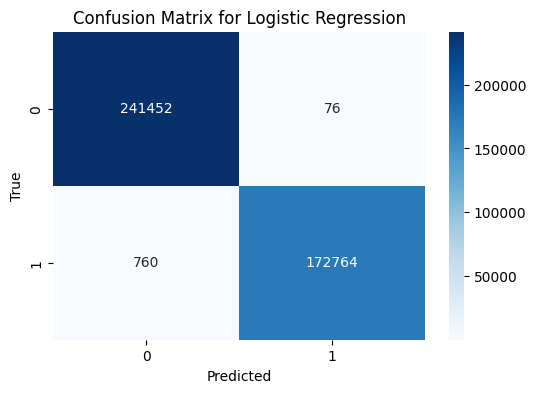

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
# Classification Report
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, y_pred_logistic))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241528
           1       1.00      1.00      1.00    173524

    accuracy                           1.00    415052
   macro avg       1.00      1.00      1.00    415052
weighted avg       1.00      1.00      1.00    415052



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert continuous predictions to binary (threshold at 0.5)
y_pred_linear_binary = (y_pred_linear > 0.5).astype(int)

# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear_binary)

# Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear_binary)

# Precision, Recall, F1-Score
precision_linear = precision_score(y_test, y_pred_linear_binary)
recall_linear = recall_score(y_test, y_pred_linear_binary)
f1_linear = f1_score(y_test, y_pred_linear_binary)

# Print performance metrics for Linear Regression
print(f"Linear Regression Performance Metrics:")
print(f"Accuracy: {accuracy_linear * 100:.2f}%")
print(f"Precision: {precision_linear:.2f}")
print(f"Recall: {recall_linear:.2f}")
print(f"F1 Score: {f1_linear:.2f}")

# Confusion Matrix for Linear Regression
print("\nConfusion Matrix for Linear Regression:")
print(cm_linear)

# Classification Report for Linear Regression
print("\nClassification Report for Linear Regression:")
print(classification_report(y_test, y_pred_linear_binary))

Linear Regression Performance Metrics:
Accuracy: 97.96%
Precision: 1.00
Recall: 0.95
F1 Score: 0.98

Confusion Matrix for Linear Regression:
[[241072    456]
 [  8016 165508]]

Classification Report for Linear Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    241528
           1       1.00      0.95      0.98    173524

    accuracy                           0.98    415052
   macro avg       0.98      0.98      0.98    415052
weighted avg       0.98      0.98      0.98    415052



In [ ]:
# Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Precision, Recall, F1-Score
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print performance metrics for Logistic Regression
print(f"\nLogistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print(f"F1 Score: {f1_logistic:.2f}")

# Confusion Matrix for Logistic Regression
print("\nConfusion Matrix for Logistic Regression:")
print(cm_logistic)

# Classification Report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Performance Metrics:
Accuracy: 99.80%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix for Logistic Regression:
[[241452     76]
 [   760 172764]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241528
           1       1.00      1.00      1.00    173524

    accuracy                           1.00    415052
   macro avg       1.00      1.00      1.00    415052
weighted avg       1.00      1.00      1.00    415052



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Fill missing values or drop them
df = df.dropna()

# Define features (X) and target (y)
# Use appropriate columns as features and the target. Replace 'Global_active_power' if needed.
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']  # Target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data for PCA and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.38768712 0.16417735 0.1554035  0.14093033 0.12542264]


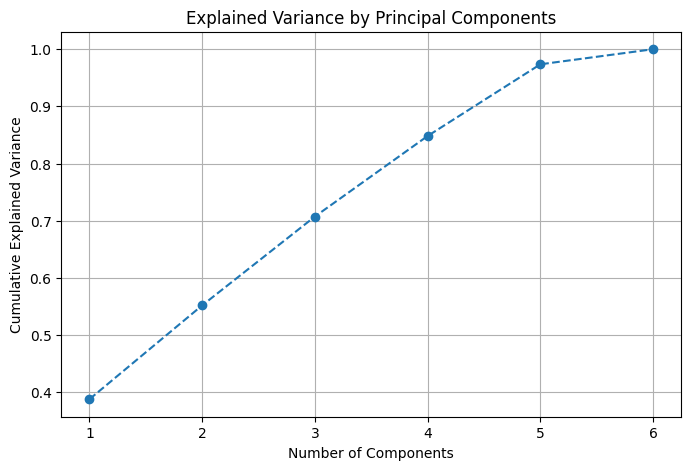

Explained variance ratio: [0.38768712 0.16417735 0.1554035  0.14093033 0.12542264]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Fill missing values or drop them
df = df.dropna()

# Define features (X) and target (y)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']  # Target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA().fit(X_train_scaled)  # Fit PCA on the training data without specifying n_components yet

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Optionally, apply PCA with the desired number of components
pca = PCA(n_components=0.95)  # Adjust n_components to keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [ ]:
print(df.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


Explained variance ratio: [0.3805451  0.17157162 0.16319208 0.13066084 0.12578545]
Naive Bayes Accuracy: 93.67%
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       173
           1       0.94      0.91      0.92       127

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300

Confusion Matrix for Naive Bayes:
 [[166   7]
 [ 12 115]]
SVM Accuracy: 97.00%
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       173
           1       0.98      0.94      0.96       127

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Confusion Matrix for SVM:
 [[171   2]
 [  7 120]]


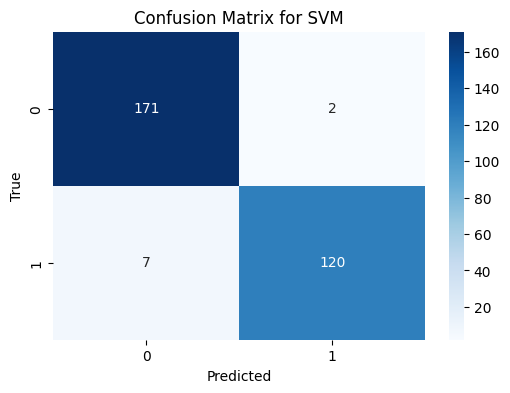

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Convert 'Global_active_power' to numeric, coercing errors to NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Reduce the sample size to 1000 rows
df = df.sample(n=1000, random_state=42)

# Define features (X) and target (y)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = (df['Global_active_power'] > df['Global_active_power'].mean()).astype(int)  # Binary classification for Naive Bayes and SVM

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (Preserve 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

### 1. Naive Bayes Classification ###
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)

# Predict using Naive Bayes
y_pred_nb = nb_model.predict(X_test_pca)

# Evaluate Naive Bayes performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix for Naive Bayes:\n", confusion_matrix(y_test, y_pred_nb))

### 2. Support Vector Machine (SVM) ###
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test_pca)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))

# Plot confusion matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()



Explained variance ratio: [0.38887379 0.1728636  0.15691999 0.13062736 0.12415339]


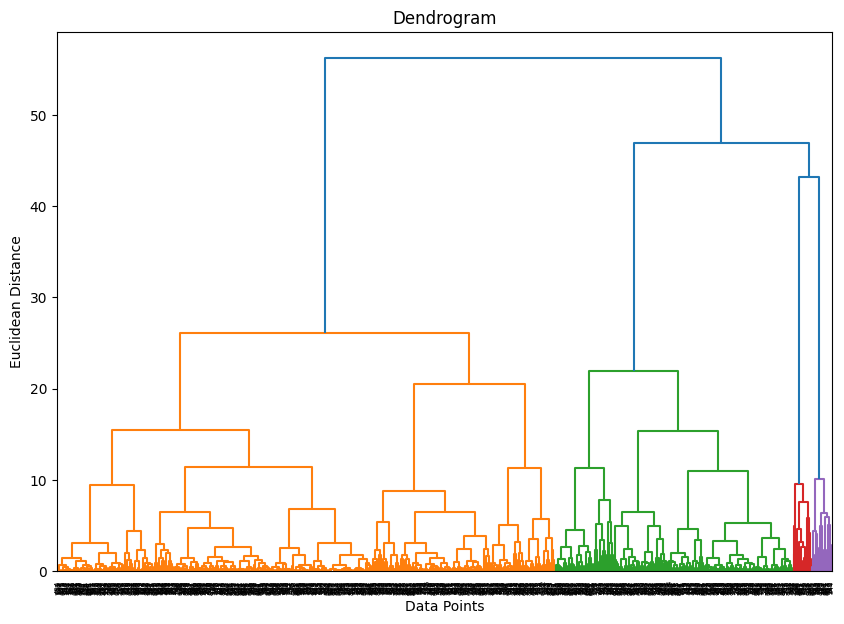

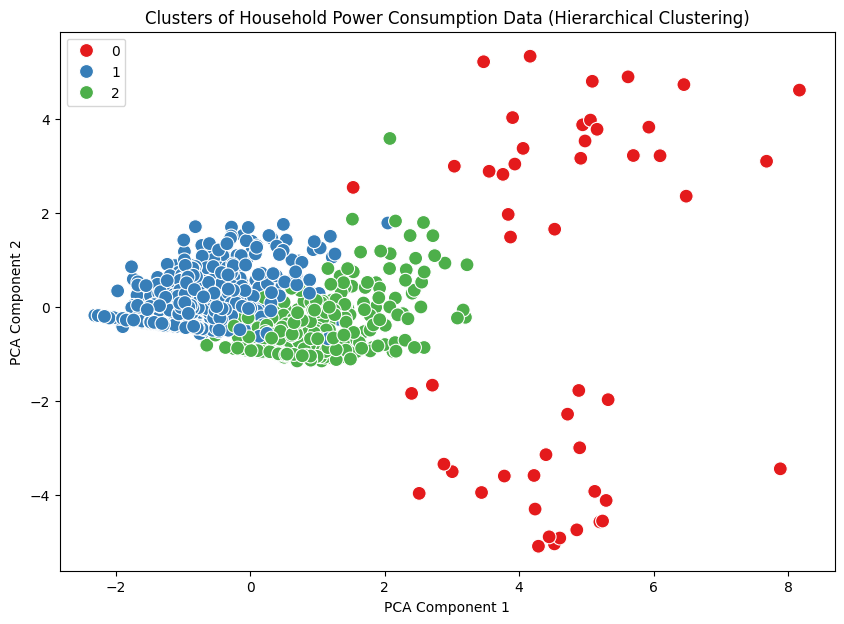

Silhouette Score for Hierarchical Clustering: 0.42


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Convert 'Global_active_power' to numeric, coercing errors to NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Reduce the sample size to 1000 rows
df = df.sample(n=1000, random_state=42)

# Define features (X)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (Preserve 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Implement Hierarchical Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)

# Add cluster labels to the dataframe for better visualization
df['Cluster'] = y_hc

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_hc, palette='Set1', s=100)
plt.title('Clusters of Household Power Consumption Data (Hierarchical Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Calculate and print the silhouette score to evaluate clustering performance
sil_score = silhouette_score(X_pca, y_hc)
print(f"Silhouette Score for Hierarchical Clustering: {sil_score:.2f}")


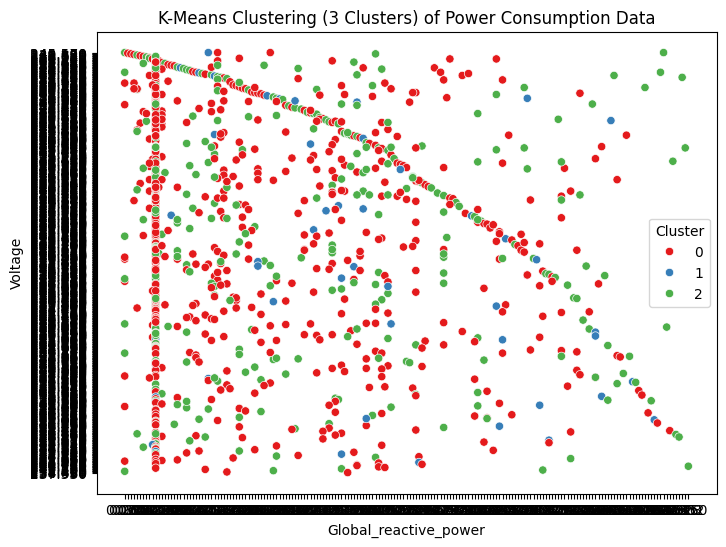

Cluster sizes:
Cluster
0    620
2    332
1     48
Name: count, dtype: int64
Cluster Centers:
 [[-0.09582857  0.24836854 -0.57361125 -0.16012815 -0.15442352 -0.72809882]
 [ 0.67507917 -1.25724459  2.80800674  3.0284097   3.07510307  0.74934727]
 [ 0.08189046 -0.28365294  0.66896757 -0.13874345 -0.15621734  1.25734351]]


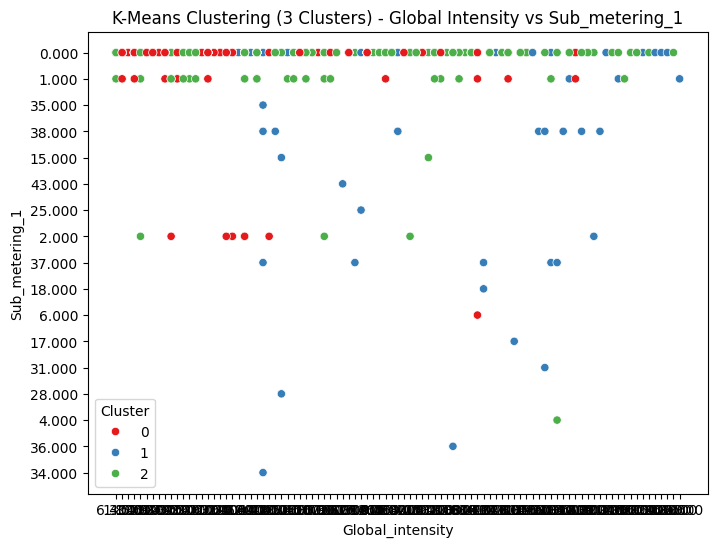

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Step 2: Convert 'Global_active_power' to numeric and handle missing values
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

# Reduce the dataset to 1000 rows for simplicity
df = df.sample(n=1000, random_state=42)

# Step 3: Select features for clustering (energy-related features)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Step 4: Standardize the data to ensure equal weight of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Step 6: Get the cluster labels
df['Cluster'] = kmeans.labels_

# Step 7: Visualize the clusters based on two selected features (e.g., 'Global_reactive_power' vs 'Voltage')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Global_reactive_power', y='Voltage', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clustering (3 Clusters) of Power Consumption Data')
plt.show()

# Step 8: Analyze cluster patterns
green_cluster = df[df['Cluster'] == 0]  # You can explore the features of each cluster in more detail.
blue_cluster = df[df['Cluster'] == 1]
red_cluster = df[df['Cluster'] == 2]

# Show the number of days in each cluster
print("Cluster sizes:")
print(df['Cluster'].value_counts())

# Show centroids of each cluster
print("Cluster Centers:\n", kmeans.cluster_centers_)

# OPTIONAL: Plot clusters for different feature combinations (for more insights)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Global_intensity', y='Sub_metering_1', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clustering (3 Clusters) - Global Intensity vs Sub_metering_1')
plt.show()


----- K-Means Clustering -----
K-Means Silhouette Score: 0.407
K-Means Calinski-Harabasz Index: 413.485
K-Means Davies-Bouldin Index: 1.204


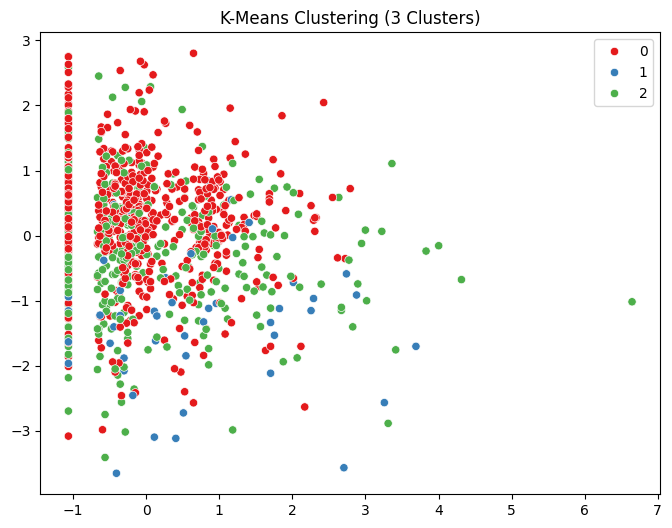

----- Hierarchical Clustering -----
Hierarchical Silhouette Score: 0.404
Hierarchical Calinski-Harabasz Index: 406.002
Hierarchical Davies-Bouldin Index: 1.191


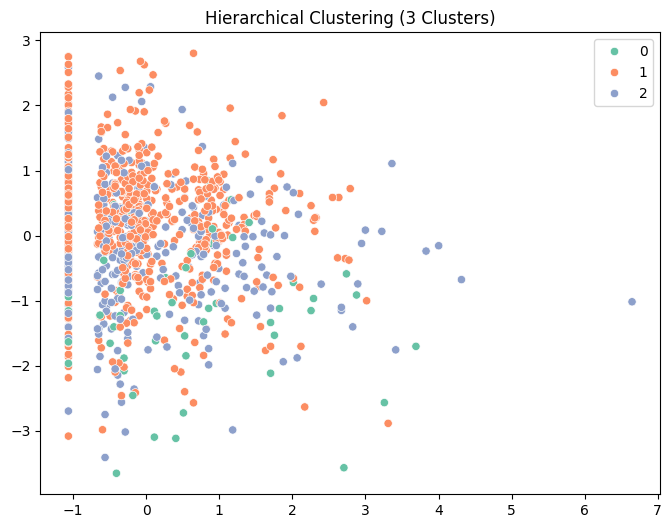

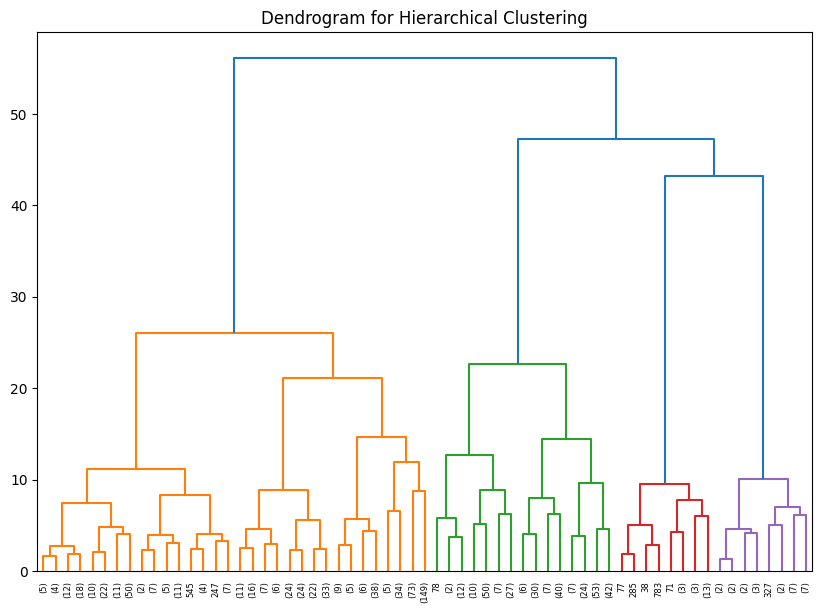

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Step 2: Convert 'Global_active_power' to numeric and handle missing values
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

# Reduce the dataset to 1000 rows for simplicity
df = df.sample(n=1000, random_state=42)

# Step 3: Select features for clustering
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means Clustering ###
print("----- K-Means Clustering -----")

# Step 5: Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Step 6: Get cluster labels for K-Means
kmeans_labels = kmeans.labels_

# Step 7: Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Calinski-Harabasz Index: {kmeans_calinski:.3f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin:.3f}")

# Step 8: Visualize K-Means clusters using first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering (3 Clusters)')
plt.show()

### Hierarchical Clustering ###
print("----- Hierarchical Clustering -----")

# Step 9: Apply Agglomerative Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Step 10: Evaluate Hierarchical clustering
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(X_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X_scaled, hierarchical_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.3f}")
print(f"Hierarchical Calinski-Harabasz Index: {hierarchical_calinski:.3f}")
print(f"Hierarchical Davies-Bouldin Index: {hierarchical_davies_bouldin:.3f}")

# Step 11: Visualize Hierarchical clusters using first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=hierarchical_labels, palette='Set2')
plt.title('Hierarchical Clustering (3 Clusters)')
plt.show()

# Step 12: Plot dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Convert 'Global_active_power' to numeric and handle missing values
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

# Reduce the dataset to 1000 rows for simplicity
df = df.sample(n=1000, random_state=42)

# Step 3: Select features and target
# Using the columns related to power consumption as features, and a binary target based on 'Global_active_power'
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = (df['Global_active_power'] > df['Global_active_power'].mean()).astype(int)  # Binary target

# Step 4: Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20]
}

# Step 7: Use GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Step 8: Get the best model and evaluate it
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Optimized Decision Tree Accuracy:", accuracy_dt)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)


Optimized Decision Tree Accuracy: 1.0
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


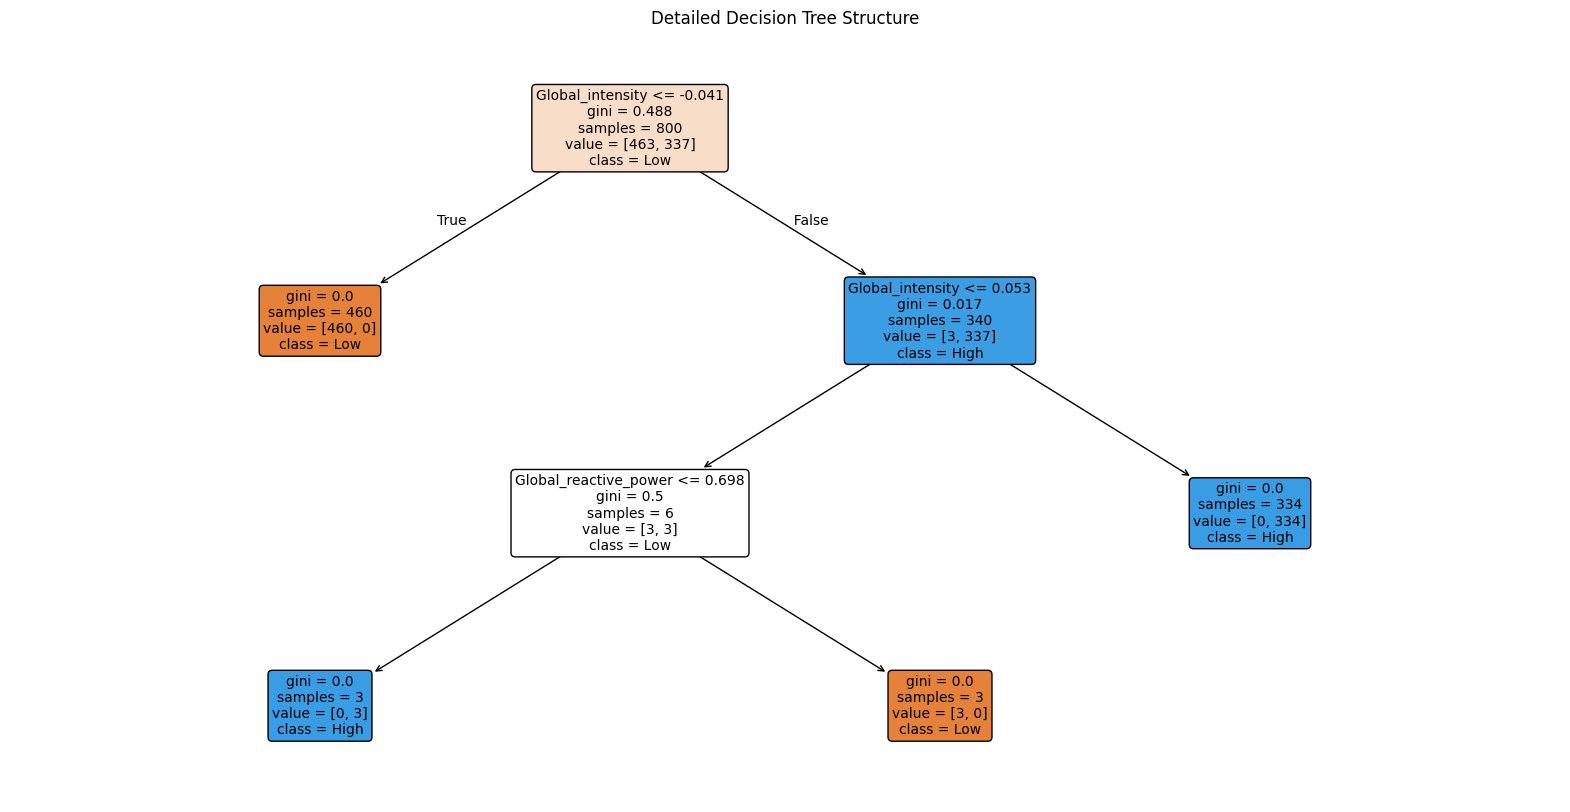

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the best Decision Tree model
plt.figure(figsize=(20, 10))  # Adjust size as needed for readability
plot_tree(
    best_dt_model,
    feature_names=['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
    class_names=['Low', 'High'],  # Adjust based on binary classification target
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Detailed Decision Tree Structure")
plt.show()



Random Forest Accuracy: 0.9933333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       173
           1       0.98      1.00      0.99       127

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Confusion Matrix:
 [[171   2]
 [  0 127]]


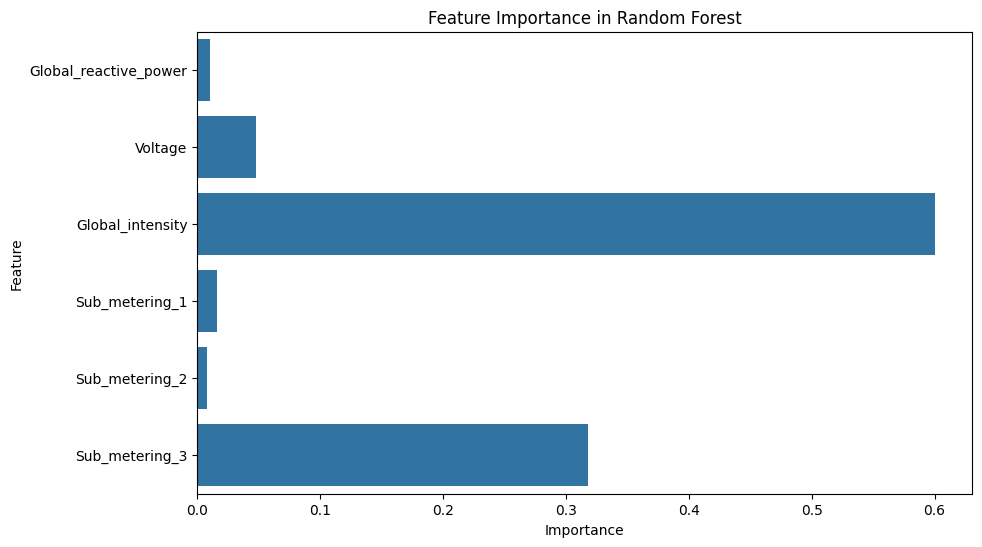

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Step 3: Convert 'Global_active_power' to numeric and drop missing values
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

# Step 4: Reduce the sample size to 1000 rows for simplicity
df = df.sample(n=1000, random_state=42)

# Step 5: Define features (X) and target (y)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = (df['Global_active_power'] > df['Global_active_power'].mean()).astype(int)  # Binary classification

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 8: Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Adjust max_depth and n_estimators as needed
rf_model.fit(X_train, y_train)

# Step 9: Predict on test data
y_pred = rf_model.predict(X_test)

# Step 10: Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 11: Feature Importance
importances = rf_model.feature_importances_
feature_names = ['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6510 - loss: 0.5960 - val_accuracy: 0.9600 - val_loss: 0.2356
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9541 - loss: 0.1869 - val_accuracy: 0.9633 - val_loss: 0.0925
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9668 - loss: 0.0817 - val_accuracy: 0.9767 - val_loss: 0.0555
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0424 - val_accuracy: 0.9867 - val_loss: 0.0396
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0389 - val_accuracy: 0.9900 - val_loss: 0.0290
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0179 - val_accuracy: 0.9900 - val_loss: 0.0233
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0150 - val_accuracy: 0.9933 - val_loss: 0.0195
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0162 - val_accuracy: 0.9933 - val_loss: 0.0176
Epo

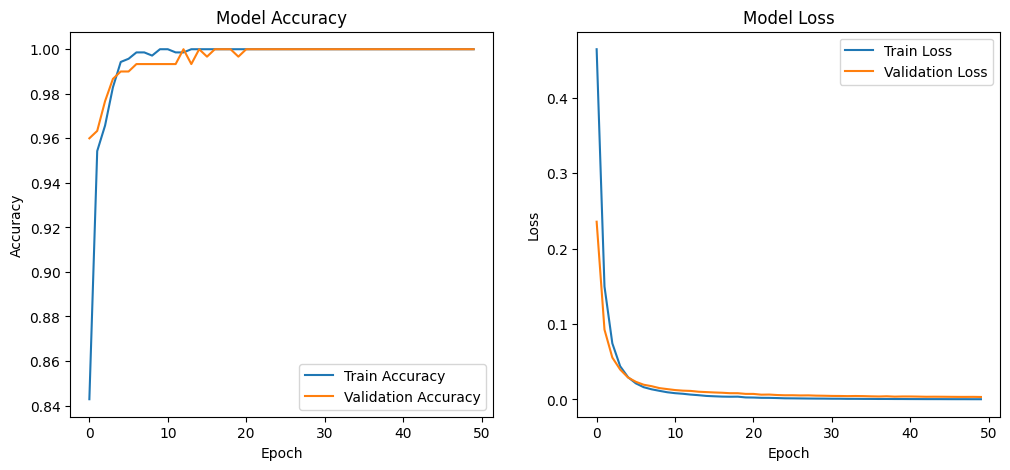

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Step 3: Convert 'Global_active_power' to numeric and drop missing values
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

# Step 4: Reduce the sample size to 1000 rows for simplicity
df = df.sample(n=1000, random_state=42)

# Step 5: Define features (X) and target (y)
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = (df['Global_active_power'] > df['Global_active_power'].mean()).astype(int)  # Binary classification

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 8: Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))                              # Second hidden layer
model.add(Dense(1, activation='sigmoid'))                            # Output layer (binary classification)

# Step 9: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 10: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

# Step 11: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary output
accuracy = accuracy_score(y_test, y_pred)
print("ANN Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 12: Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';', low_memory=False)

# Step 2: Preprocess the data
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()
df = df.sample(n=1000, random_state=42)

X = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = (df['Global_active_power'] > df['Global_active_power'].mean()).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Step 4: Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Step 5: ANN Model
ann_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Evaluate ANN
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

# Step 6: Print all accuracies for comparison
print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")
print(f"ANN Accuracy: {accuracy_ann:.3f}")

# Optional: display classification reports for each model for more detail
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nANN Classification Report:\n", classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Decision Tree Accuracy: 1.000
Random Forest Accuracy: 0.993
ANN Accuracy: 1.000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       127

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       173
           1       0.98      1.00      0.99       127

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


ANN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
          